Imports 

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, average_precision_score, precision_score
import sys
import os
import pickle

sys.path.append('E:\\Titanic---Machine-Learning-from-Disaster\\Codes')

from utils.functions import get_train_test_data


In [9]:
path_train = "E:\\Titanic---Machine-Learning-from-Disaster\\Data\\train.csv"
path_test = "E:\\Titanic---Machine-Learning-from-Disaster\\Data\\test.csv"

df_train, df_test = get_train_test_data(path_train, path_test, pre_processing_enabled=True)


E:\Titanic---Machine-Learning-from-Disaster\Codes\utils\functions.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].interpolate(method='linear', inplace=True)
E:\Titanic---Machine-Learning-from-Disaster\Codes\utils\functions.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [10]:
with open("Results_GS\\grid_search_result.pkl", "rb") as file:
    loaded_grid_search = pickle.load(file)

print(loaded_grid_search.best_estimator_)
print(loaded_grid_search.best_params_)


RandomForestClassifier(criterion='entropy', max_depth=30, min_samples_leaf=2,
                       min_samples_split=10, n_estimators=200)
{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}


In [11]:
X = df_train.drop("Survived", axis=1)
y = df_train["Survived"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [17]:
model = RandomForestClassifier(**loaded_grid_search.best_params_)
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=30, min_samples_leaf=2,
                       min_samples_split=10, n_estimators=200)

In [18]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
avg_precision = average_precision_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f"Accuracy Score: {accuracy:.4f}")
print(f"Average Precision Score: {avg_precision:.4f}")
print(f"Precision Score: {precision:.4f}")

Accuracy Score: 0.8068
Average Precision Score: 0.6887
Precision Score: 0.8462


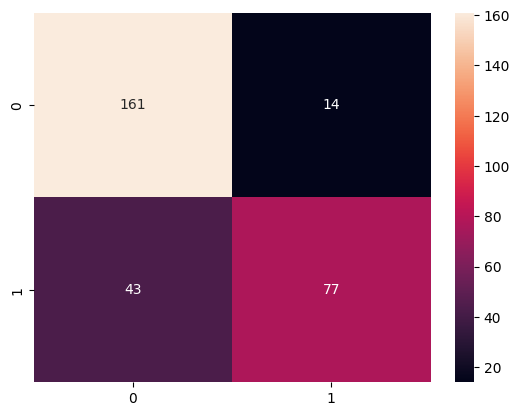

In [19]:
import seaborn as sns
sns.heatmap(conf_matrix, annot=True, fmt='');

In [23]:
p = model.predict(df_test)

In [24]:
sub = pd.Series(p, index=df_test.index, name="Survived")
sub

PassengerId
892     0
893     0
894     0
895     0
896     0
       ..
1305    0
1306    1
1307    0
1308    0
1309    0
Name: Survived, Length: 418, dtype: int64

In [30]:
sub.to_csv("..\\..\\Models\\model_RF.csv", header=True)